In [1]:
# importing a 3-class dataset from sklearn's toy dataset
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = load_wine()
X = dataset.data
y = dataset.target

In [3]:
X.shape, y.shape

((178, 13), (178,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(kernel='rbf', C=1)
svc.fit(X_train, y_train)

SVC(C=1)

In [5]:
y_pred = svc.predict(X_test)

y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

In [6]:
confusion = confusion_matrix(y_test, y_pred)

In [7]:
classes = ['Class 1', 'Class 2', 'Class 3']

### Confusion Matrix

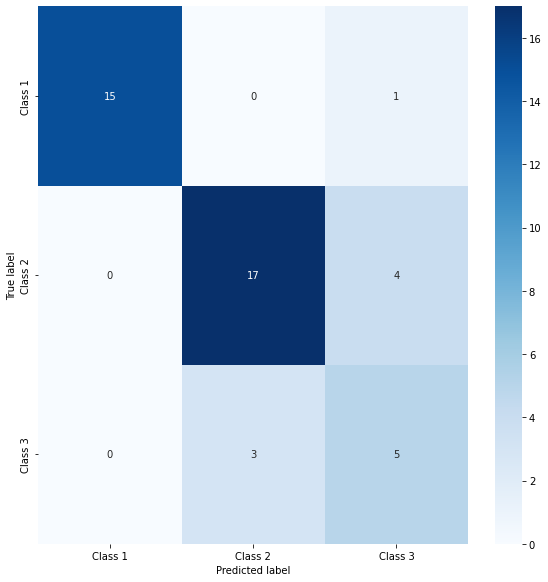

In [20]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat, index=classes, columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Sklearn built-in statistics

In [18]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=classes))


Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.78
Macro Recall: 0.79
Macro F1-score: 0.78

Weighted Precision: 0.84
Weighted Recall: 0.82
Weighted F1-score: 0.83

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      0.94      0.97        16
     Class 2       0.85      0.81      0.83        21
     Class 3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



### Custom statistics

In [9]:
FP = con_mat_df.sum(axis=0) - np.diag(con_mat_df)
FN = con_mat_df.sum(axis=1) - np.diag(con_mat_df)
TP = np.diag(con_mat_df)
TN = con_mat_df.values.sum() - (FP + FN + TP)

In [10]:
class1_false_pos = FP[0]
class2_false_pos = FP[1]
class3_false_pos = FP[2]

class1_false_neg = FN[0]
class2_false_neg = FN[1]
class3_false_neg = FN[2]

class1_true_pos = TP[0]
class2_true_pos = TP[1]
class3_true_pos = TP[2]

class1_true_neg = TN[0]
class2_true_neg = TN[1]
class3_true_neg = TN[2]
 
df = pd.DataFrame({
    'Class': classes,
    'False Positives (FP)': [class1_false_pos, class2_false_pos, class3_false_pos],
    'False Negatives (FN)': [class1_false_neg, class2_false_neg, class3_false_neg],
    'True Positives (TP)': [class1_true_pos, class2_true_pos, class3_true_pos],
    'True Negatives (TN)': [class1_true_neg, class2_true_neg, class3_true_neg]
})

df

,Class,False Positives (FP),False Negatives (FN),True Positives (TP),True Negatives (TN)
0,Class 1,0,1,15,29
1,Class 2,3,4,17,21
2,Class 3,5,3,5,32


In [11]:
class1_n = (class1_false_pos + class1_false_neg + class1_true_pos + class1_true_neg)
            
class2_n = (class2_false_pos + class2_false_neg + class2_true_pos + class2_true_neg)
            
class3_n = (class3_false_pos + class3_false_neg + class3_true_pos + class3_true_neg)
    

class1_n, class2_n, class3_n

(45, 45, 45)

In [12]:
# Sensibility -> true_pos / (true_pos + false_neg)

class1_sensibility = class1_true_pos / (class1_true_pos + class1_false_neg)
class2_sensibility = class2_true_pos / (class2_true_pos + class2_false_neg)
class3_sensibility = class3_true_pos / (class3_true_pos + class3_false_neg)

print('Sensibility\n')
print('Class 1: ', '{:.2f}'.format(class1_sensibility))
print('Class 2: ', '{:.2f}'.format(class2_sensibility))
print('Class 3: ', '{:.2f}'.format(class3_sensibility))

Sensibility

Class 1:  0.94
Class 2:  0.81
Class 3:  0.62


In [13]:
# Specificity -> true_neg / (false_pos + true_neg)

class1_specificity = class1_true_neg / (class1_false_pos + class1_true_neg)
class2_specificity = class2_true_neg / (class2_false_pos + class2_true_neg)
class3_specificity = class3_true_neg / (class3_false_pos + class3_true_neg)

print('Specificity\n')
print('Class 1: ', '{:.2f}'.format(class1_specificity))
print('Class 2: ', '{:.2f}'.format(class2_specificity))
print('Class 3: ', '{:.2f}'.format(class3_specificity))

Specificity

Class 1:  1.00
Class 2:  0.88
Class 3:  0.86


In [14]:
# Accuracy -> (true_pos + true_neg) / num_of_elements

class1_accuracy = (class1_true_pos + class1_true_neg) / class1_n
class2_accuracy = (class2_true_pos + class2_true_neg) / class2_n
class3_accuracy = (class3_true_pos + class3_true_neg) / class3_n

print('Accuracy\n')
print('Class 1: ', '{:.2f}'.format(class1_accuracy))
print('Class 2: ', '{:.2f}'.format(class2_accuracy))
print('Class 3: ', '{:.2f}'.format(class3_accuracy))

Accuracy

Class 1:  0.98
Class 2:  0.84
Class 3:  0.82


In [15]:
# Precision -> true_pos / (true_pos + false_pos)

class1_precision = class1_true_pos / (class1_true_pos + class1_false_pos)
class2_precision = class2_true_pos / (class2_true_pos + class2_false_pos)
class3_precision = class3_true_pos / (class3_true_pos + class3_false_pos)

print('Precision\n')
print('Class 1: ', '{:.2f}'.format(class1_precision))
print('Class 2: ', '{:.2f}'.format(class2_precision))
print('Class 3: ', '{:.2f}'.format(class3_precision))

Precision

Class 1:  1.00
Class 2:  0.85
Class 3:  0.50


In [16]:
# F-score -> 2 * (precision * sensibility) / (precision + sensibility)

class1_f_score = 2 * (class1_precision * class1_sensibility) / (class1_precision + class1_sensibility)
class2_f_score = 2 * (class2_precision * class2_sensibility) / (class2_precision + class2_sensibility)
class3_f_score = 2 * (class3_precision * class3_sensibility) / (class3_precision + class3_sensibility)

print('F-score\n')
print('Class 1: ', '{:.2f}'.format(class1_f_score))
print('Class 2: ', '{:.2f}'.format(class2_f_score))
print('Class 3: ', '{:.2f}'.format(class3_f_score))

F-score

Class 1:  0.97
Class 2:  0.83
Class 3:  0.56
